___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

In [25]:
%matplotlib inline
path_data = '../../data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns

# Várias categorias

Se os painéis do júri são representativos da população elegível continua a ser uma questão importante. Abordaremos isso no contexto de painéis mais recentes do que o de Robert Swain na década de 1960.

O processo geral de avaliação será o mesmo de antes. Mas desta vez vamos considerar painelistas em várias categorias raciais e étnicas, não apenas duas. Do ponto de vista técnico, isso significa que teremos que criar uma nova estatística para simular. Depois de simular e chegar a uma conclusão, examinaremos algumas das causas subjacentes das discrepâncias que observamos.

## Seleção do Júri no Condado de Alameda

Em 2010, a American Civil Liberties Union (ACLU) do norte da Califórnia apresentou um [relatório](https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf "ACLU_NC report") sobre a seleção do júri no Condado de Alameda , Califórnia. O relatório concluiu que certos grupos raciais e étnicos estão sub-representados entre os membros do júri no Condado de Alameda e sugeriu algumas reformas do processo pelo qual os jurados elegíveis são designados para os painéis. Nesta seção, analisaremos os dados fornecidos pela ACLU.

Como você viu na seção anterior, os jurados do julgamento são selecionados a partir de um painel de jurados maior. Por lei, o painel do júri deve ser representativo da população de jurados elegíveis. Na Califórnia, a palavra "representante" é claramente definida como "selecionado aleatoriamente". A seção 197 do Código de Processo Civil da Califórnia diz: "Todas as pessoas selecionadas para o serviço do júri devem ser selecionadas aleatoriamente, de uma fonte ou fontes que incluam uma seção transversal representativa da população da área atendida pelo tribunal".

Aqui, "selecionado para o serviço do júri" significa ser selecionado para fazer parte do painel do júri.

## Composição de Painéis no Condado de Alameda

O foco do estudo da ACLU do norte da Califórnia foi a composição racial e étnica dos painéis do júri no Condado de Alameda. A ACLU compilou dados sobre a composição dos painéis do júri em 11 julgamentos criminais no Condado de Alameda nos anos de 2009 e 2010. Nesses painéis, o número total de pessoas que compareceram ao serviço do júri foi de 1.453. A ACLU reuniu dados demográficos de todos os esses jurados em potencial e comparou esses dados com a composição de todos os jurados elegíveis no condado.

Os dados são tabulados a seguir em uma tabela denominada ``júri``. Em cada categoria, o primeiro valor numérico é a proporção de todos os candidatos a jurados elegíveis naquela categoria. O segundo valor é a proporção de pessoas dessa categoria entre os que compareceram ao processo de seleção para o júri.

Os rótulos para as diferentes categorias são retirados do relatório da ACLU, que diz: "A categoria 'outros' inclui pessoas que se identificaram como mestiças sem identificar uma identidade racial primária e indivíduos que não identificaram uma raça ou etnia". O rótulo 'Asian/PI' significa "asiático ou ilhéu do Pacífico". O rótulo 'Black/AA' significa "negro ou afro-americano".

In [2]:
jury = pd.DataFrame({
   'Ethnicity':('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'), 
   'Eligible':(0.15, 0.18, 0.54, 0.12, 0.01),
   'Panels': (0.26, 0.08, 0.54, 0.08, 0.04)
})

jury

,Ethnicity,Eligible,Panels
0,Asian/PI,0.15,0.26
1,Black/AA,0.18,0.08
2,Caucasian,0.54,0.54
3,Hispanic,0.12,0.08
4,Other,0.01,0.04


Algumas etnias estão super-representadas e outras sub-representadas nos painéis do júri do estudo. Em particular, os painelistas nas categorias `Black/AA` e `Hispanic` estão sub-representados.

Um gráfico de barras é útil para visualizar as diferenças.

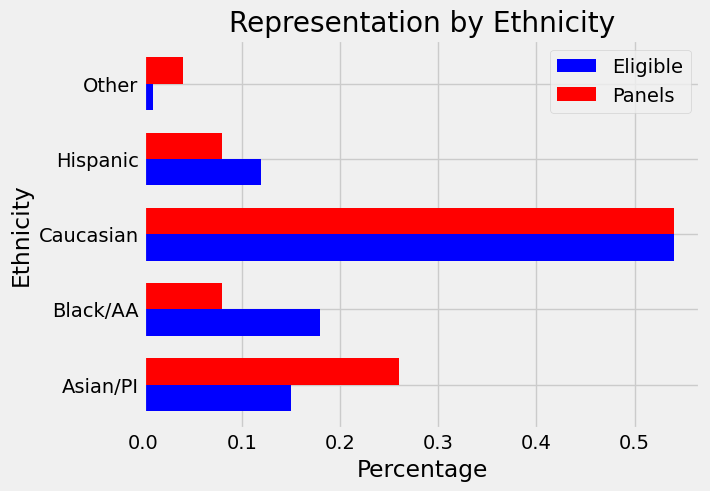

In [18]:
bar_width = 0.35  # Width of the bars

# Calculate the positions of the bars on the y-axis
bar_positions = np.arange(len(jury['Ethnicity']))

plt.barh(bar_positions, jury['Eligible'], height=bar_width, color='blue', label='Eligible')
plt.barh(bar_positions + bar_width, jury['Panels'], height=bar_width, color='red', label='Panels')

plt.yticks(bar_positions + bar_width / 2, jury['Ethnicity'])  # Set the tick positions and labels on the y-axis
plt.xlabel('Percentage')
plt.ylabel('Ethnicity')
plt.title('Representation by Ethnicity')

plt.legend()
plt.show()

## Comparação com painéis selecionados aleatoriamente
E se selecionarmos uma amostra aleatória de 1.453 pessoas da população de jurados elegíveis? A distribuição de suas etnias se parecerá com a distribuição dos painéis acima?

Podemos responder a essas perguntas usando `sample_proportions` e aumentando a tabela `jury` com uma coluna das proporções em nossa amostra.

**Nota técnica.** Amostras aleatórias de possíveis jurados seriam selecionadas sem reposição. No entanto, quando o tamanho de uma amostra é pequeno em relação ao tamanho da população, a amostragem sem reposição se assemelha à amostragem com reposição; as proporções na população não mudam muito entre os sorteios. A população de jurados elegíveis no Condado de Alameda é de mais de um milhão e, comparada a isso, uma amostra de cerca de 1.500 é bem pequena. Iremos, portanto, amostrar com reposição.

Na célula abaixo, amostramos aleatoriamente 1.453 vezes da distribuição de jurados elegíveis e exibimos a distribuição da amostra aleatória junto com as distribuições dos jurados elegíveis e do painel nos dados.

In [30]:
def sample_proportions(sample_size, sample_population):
    return np.random.multinomial(sample_size, sample_population) / sample_size

In [43]:
eligible_population = jury['Eligible']
sample_distribution = sample_proportions(1453, eligible_population)
new_col = pd.DataFrame({'Random Sample': sample_distribution})
panels_and_sample = pd.concat([jury, new_col], axis=1)
panels_and_sample

,Ethnicity,Eligible,Panels,Random Sample
0,Asian/PI,0.15,0.26,0.138334
1,Black/AA,0.18,0.08,0.176187
2,Caucasian,0.54,0.54,0.540950
3,Hispanic,0.12,0.08,0.129387
4,Other,0.01,0.04,0.015141


The distribution of the random sample is quite close to the distribution of the eligible population, unlike the distribution of the panels. As always, it helps to visualize.

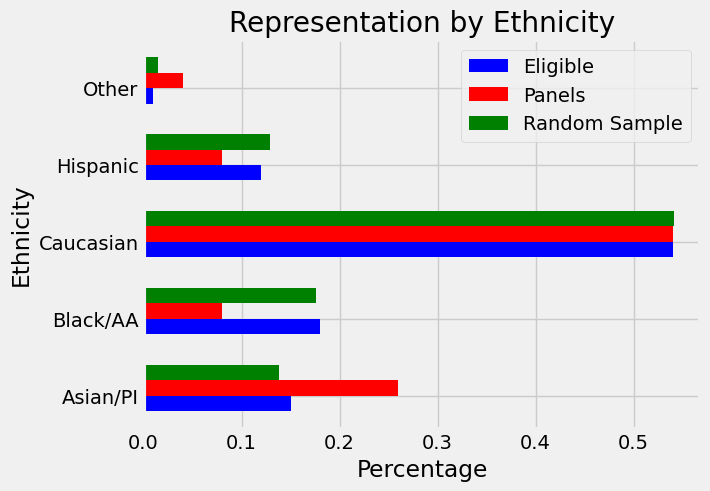

In [50]:
bar_width = 0.20  # Width of the bars

# Calculate the positions of the bars on the y-axis
bar_positions = np.arange(len(panels_and_sample['Ethnicity']))

plt.barh(bar_positions, panels_and_sample['Eligible'], height=bar_width, color='blue', label='Eligible')
plt.barh(bar_positions + bar_width, panels_and_sample['Panels'], height=bar_width, color='red', label='Panels')
plt.barh(bar_positions + bar_width * 2, panels_and_sample['Random Sample'], height=bar_width, color='green', label='Random Sample')

plt.yticks(bar_positions + bar_width/2, panels_and_sample['Ethnicity'])  # Set the tick positions and labels on the y-axis
plt.xlabel('Percentage')
plt.ylabel('Ethnicity')
plt.title('Representation by Ethnicity')

plt.legend()
plt.show()

O gráfico de barras mostra que a distribuição da amostra aleatória se assemelha à população elegível, mas a distribuição dos painéis não.

Para avaliar se essa observação é específica de uma amostra aleatória ou mais geral, podemos simular vários painéis sob o modelo de seleção aleatória e ver o que as simulações prevêem. Mas não poderemos olhar para milhares de gráficos de barras como o acima. Precisamos de uma estatística que nos ajude a avaliar se o modelo ou a seleção aleatória é ou não compatível com os dados.

## Uma nova estatística: a distância entre duas distribuições
Sabemos como medir a diferença entre dois números: se os números são $x$ e $y$, a distância entre eles é $\vert x-y \vert$. Agora temos que quantificar a distância entre duas distribuições. Por exemplo, temos que medir a distância entre as distribuições azul e vermelho abaixo.

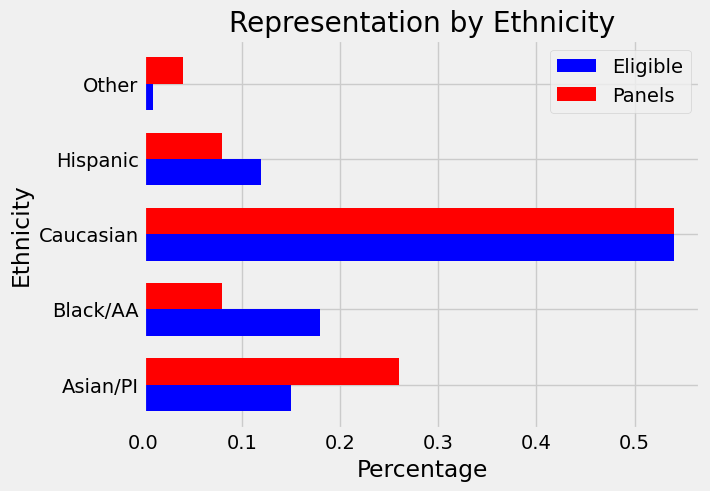

In [51]:
bar_width = 0.35  # Width of the bars

# Calculate the positions of the bars on the y-axis
bar_positions = np.arange(len(jury['Ethnicity']))

plt.barh(bar_positions, jury['Eligible'], height=bar_width, color='blue', label='Eligible')
plt.barh(bar_positions + bar_width, jury['Panels'], height=bar_width, color='red', label='Panels')

plt.yticks(bar_positions + bar_width / 2, jury['Ethnicity'])  # Set the tick positions and labels on the y-axis
plt.xlabel('Percentage')
plt.ylabel('Ethnicity')
plt.title('Representation by Ethnicity')

plt.legend()
plt.show()

Para isso, calcularemos uma quantidade chamada *distância de variação total* entre duas distribuições. O cálculo é como uma extensão de como encontramos a distância entre dois números.

Para calcular a distância de variação total, primeiro encontramos a diferença entre as duas proporções em cada categoria.

In [53]:
new_col = pd.DataFrame(jury['Panels'] - jury['Eligible'], columns=['Difference'])
panels_and_diff = pd.concat([jury, new_col], axis=1)

panels_and_diff

,Ethnicity,Eligible,Panels,Difference
0,Asian/PI,0.15,0.26,0.11
1,Black/AA,0.18,0.08,-0.10
2,Caucasian,0.54,0.54,0.00
3,Hispanic,0.12,0.08,-0.04
4,Other,0.01,0.04,0.03


Dê uma olhada na coluna `Diferença` e observe que a soma de suas entradas é 0: as entradas positivas somam 0,14, cancelando exatamente o total das entradas negativas que é -0,14.

Esta é uma evidência numérica do fato de que no gráfico de barras, as barras de ouro excedem as barras azuis exatamente tanto quanto as barras azuis excedem o ouro. As proporções em cada uma das duas colunas ``Panels`` e ``Eligible`` somam 1 e, portanto, o dar e receber entre suas entradas deve somar 0.

Para evitar o cancelamento, descartamos os sinais negativos e adicionamos todas as entradas. Mas isso nos dá duas vezes o total das entradas positivas (equivalentemente, duas vezes o total das entradas negativas, com o sinal removido). Não precisamos dessa duplicação, então dividimos a soma por 2.

In [54]:
panels_and_diff['Absolute Difference'] = abs(panels_and_diff['Difference'])

panels_and_diff

,Ethnicity,Eligible,Panels,Difference,Absolute Difference
0,Asian/PI,0.15,0.26,0.11,0.11
1,Black/AA,0.18,0.08,-0.10,0.10
2,Caucasian,0.54,0.54,0.00,0.00
3,Hispanic,0.12,0.08,-0.04,0.04
4,Other,0.01,0.04,0.03,0.03


In [55]:
panels_and_diff['Absolute Difference'].sum() / 2

0.14

Essa quantidade 0,14 é a *distância de variação total* (TVD) entre a distribuição de etnias na população de jurados elegíveis e a distribuição nos painéis.

Em geral, a distância de variação total entre duas distribuições mede o quão próximas as distribuições estão. Quanto maior o TVD, mais diferentes aparecem as duas distribuições.

**Nota Técnica:** Poderíamos ter obtido o mesmo resultado apenas somando as diferenças positivas. Mas nosso método de incluir todas as diferenças absolutas elimina a necessidade de acompanhar quais diferenças são positivas e quais não são.

Usaremos a distância de variação total entre as distribuições como a estatística para simular sob a hipótese de seleção aleatória. Grandes valores da distância serão evidências contra a seleção aleatória.

## Simulando a estatística sob o modelo
Para ver como o TVD varia em amostras aleatórias, vamos simulá-lo repetidamente sob o modelo de seleção aleatória da população elegível.

Vamos organizar nosso cálculo. Como vamos calcular a distância de variação total repetidamente, primeiro escreveremos uma função que a calcula para duas distribuições dadas.

A função `total_variation_distance` pega dois arrays contendo as distribuições para comparar, e retorna o TVD entre eles.

In [56]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

Esta função nos ajudará a calcular nossa estatística em cada repetição da simulação. Mas primeiro vamos verificar se ele fornece a resposta correta quando o usamos para calcular a distância entre as distribuições azul (elegível) e dourada (painéis) acima. Estas são as distribuições no estudo ACLU.

In [57]:
total_variation_distance(jury['Panels'], jury['Eligible'])

0.14

Isso concorda com o valor que calculamos diretamente sem usar a função.

Na célula abaixo, usamos a função para calcular o TVD entre as distribuições dos jurados elegíveis e uma amostra aleatória. Lembre-se de que `eligible_population` é a matriz que contém a distribuição dos jurados elegíveis e que nosso tamanho de amostra é 1453.

Na primeira linha, usamos `sample_proportions` para gerar uma amostra aleatória da população elegível. Na próxima linha, usamos `total_variation_distance` para calcular o TVD entre as distribuições na amostra aleatória e na população elegível.

In [58]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.017467309015829283

Execute a célula algumas vezes e observe que as distâncias são um pouco menores que 0,14, a distância entre a distribuição dos painéis e os jurados elegíveis.

Agora estamos prontos para executar uma simulação para avaliar o modelo de seleção aleatória.

### Simulando um valor da estatística
Da mesma forma que iniciamos toda simulação, vamos definir uma função `one_simulated_tvd` que retorna um valor simulado da distância total de variação sob a hipótese de seleção aleatória.

O código no corpo da definição é baseado na célula acima.

In [59]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   

### Simulando Múltiplos Valores da Estatística
Agora podemos aplicar o processo familiar de usar um loop `for` para criar uma matriz que consiste em 5.000 dessas distâncias.

In [60]:
tvds = np.array([])
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

## Avaliando o Modelo de Seleção Aleatória

Aqui está o histograma empírico das distâncias simuladas. Ele mostra que, se você selecionar 1.453 membros do painel aleatoriamente do grupo de candidatos elegíveis, a distância entre as distribuições dos membros do painel e a população elegível raramente será maior que 0,05.

Os painéis do estudo, no entanto, não eram tão semelhantes à população elegível. A distância total de variação entre os painéis e a população foi de 0,14, representada pelo ponto vermelho no eixo horizontal. Está muito além da cauda do histograma e não se parece em nada com uma distância típica entre as distribuições de uma amostra aleatória e a população elegível.

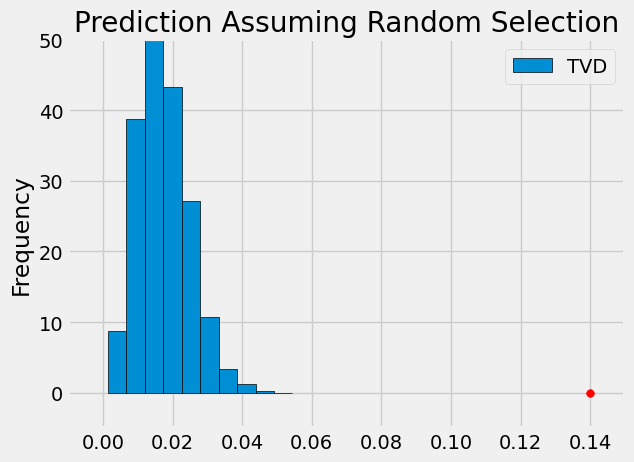

In [65]:
df_tvds = pd.DataFrame({'TVD': tvds})
df_tvds.plot(kind='hist', density=True, edgecolor="black")
plt.title('Prediction Assuming Random Selection')
plt.xlim(-0.01, 0.15)
plt.ylim(-5, 50)
plt.scatter(0.14, 0, color='red', s=30);
plt.show()

A simulação mostra que a composição dos painéis no estudo ACLU não é consistente com o modelo de seleção aleatória. Nossa análise apóia a conclusão da ACLU de que os painéis não eram representativos da distribuição fornecida para os jurados elegíveis.

## Razões para o viés
Como na maioria dessas análises, a nossa não diz *por que* as distribuições são diferentes. Mas essas razões são importantes para entender. Se os painéis do júri não representarem a população de jurados elegíveis, isso pode ter um efeito importante no devido processo legal e na imparcialidade dos julgamentos do júri.

O relatório da ACLU discute vários motivos possíveis para as discrepâncias e sugere algumas soluções. Alguns são puramente práticos, mas têm um grande impacto. Por exemplo, embora possamos presumir a alta qualidade da amostragem aleatória em Python, a seleção do painel usou outro software. O exame da ACLU revelou que o software não funcionou bem, contribuindo para uma seleção tendenciosa. Usar um software melhor é um remédio claro.

Mais significativamente, os painéis do júri do Condado de Alameda não são selecionados de toda a população elegível. O [website](http://www.alameda.courts.ca.gov/pages.aspx/faqs) do Tribunal Superior do Condado de Alameda diz: "O objetivo do tribunal é fornecer uma seção transversal precisa do população do condado. Os nomes dos jurados são selecionados aleatoriamente entre todos os que são eleitores registrados e/ou possuem carteira de motorista ou carteira de identidade emitida pelo Departamento de Veículos Motorizados."

Este processo exclui jurados elegíveis que não estão nessas listas. Ter um documento de identidade emitido pelo estado ou estar registrado para votar provavelmente está associado à renda e, portanto, também à raça e etnia devido ao viés histórico contra as comunidades negra e hispânica. Isso leva a uma sub-representação desses grupos nos painéis.

Os que estão na lista devem ser contatados para informá-los sobre a convocação do júri. Mas as pessoas em comunidades com poucos recursos nem sempre têm endereços fixos. Registros de endereços desatualizados, falta de verificação cruzada com outras listas, como as dos serviços públicos e assim por diante, podem contribuir para a seleção tendenciosa.

Uma vez alcançados, os painelistas em potencial ainda precisam aparecer. O primeiro dia de serviço do júri não é compensado e a compensação para os dias subsequentes é de \$15 por dia. Embora os empregadores sejam obrigados por lei a dispensar os funcionários que têm funções de júri, eles não são obrigados a fornecer compensação, e alguns empregadores não o fazem. Em uma região tão cara quanto a Bay Area, isso pode se tornar um motivo para os painelistas não responderem à convocação do júri. Embora os jurados possam ser dispensados por graves dificuldades econômicas, até mesmo o processo de solicitação de dispensa pode estar fora do alcance de alguns jurados. Do outro lado da baía, os líderes da cidade de São Francisco estão tentando reduzir essa forma de preconceito por meio de um [programa](https://sftreasurer.org/new-ca-bill-pilots-higher-compensation-low-income-jurors-san-francisco) que oferece uma compensação de \$100 por dia para jurados de baixa renda.

## Qualidade de Dados
Desenvolvemos uma técnica que nos ajuda a decidir se uma distribuição se parece com uma amostra aleatória de outra. Mas devemos examinar nossas fontes de dados para entender melhor exatamente o que podemos concluir de nossa análise. Uma boa ciência de dados inclui um exame cuidadoso de como os dados foram coletados.

**Juros elegíveis.** É importante ter em mente que nem todos são elegíveis para servir em um júri. Em seu [site](http://www.alameda.courts.ca.gov/pages.aspx/jury-duty-overview), o Tribunal Superior do Condado de Alameda diz: "Você pode ser chamado para servir se tiver 18 anos anos de idade, cidadão dos EUA e residente do condado ou distrito onde foi convocado. Você deve entender inglês e ser física e mentalmente capaz de servir. Além disso, você não deve ter atuado como qualquer tipo de jurado no passado 12 meses, nem foram condenados por um crime".

Embora o Censo seja uma fonte natural de informações demográficas, o Censo não coleta dados sobre todas essas categorias. Assim, a ACLU teve que obter os dados demográficos dos jurados elegíveis de alguma outra maneira.

O que eles usaram foi um conjunto de estimativas desenvolvido por um professor da San Diego State University para um julgamento do condado de Alameda em 2002. Essas estimativas foram baseadas no Censo de 2000 e também levaram em consideração os critérios exigidos para elegibilidade como jurados.

Portanto, devemos ter em mente que a distribuição que usamos para a população elegível é ela mesma uma estimativa e, portanto, sujeita a erros. Além disso, como observou a ACLU, usar estimativas baseadas no Censo de 2000 para as populações em 2010 pode não ser preciso devido à mudança demográfica na Califórnia.

Assim, a distribuição usada para a população de jurados elegíveis pode não ser precisa.

**Painéis.** Não está claro no relatório exatamente como os 1.453 participantes do painel foram classificados nas diferentes categorias étnicas. O relatório diz apenas que "os advogados ... cooperaram na coleta de dados do júri".

Fatores sociais, culturais e políticos significativos afetam quem é classificado ou autoclassificado em cada categoria étnica. Também não está claro se as definições dessas categorias nos painéis foram as mesmas usadas nas estimativas da distribuição dos jurados elegíveis. Isso levanta questões sobre a correspondência entre as duas distribuições que estão sendo comparadas.

Além disso, os dados sobre os membros do painel foram obtidos daqueles que compareceram ao serviço. Como discutimos, nem todos os membros do painel o fazem. Os motivos para não relatar estão associados a raça e etnia e afetam desproporcionalmente os painelistas de comunidades com poucos recursos.

Responder à convocação do júri é exigido por lei. Mas, como observou a ACLU, na época do estudo, o Condado de Alameda não tinha um processo eficaz para acompanhar jurados em potencial que foram chamados, mas não compareceram. A ACLU recomendou a criação de "um programa de não comparecimento que exija, no mínimo, a emissão de um segundo aviso aos jurados em potencial".

De fato, acompanhar os não respondentes reduziria o viés. Para nossa análise, devemos reconhecer que não temos os dados necessários para preencher as informações demográficas dos painelistas que foram selecionados, mas não compareceram ao serviço.

## Conclusão

Por causa da discussão acima, é importante sermos precisos sobre o que podemos concluir de nossa análise.

- Podemos concluir que a distribuição fornecida para os painelistas que compareceram ao serviço não parece uma amostra aleatória da distribuição estimada na população elegível.

Nossa discussão, como a discussão no relatório da ACLU, expõe as razões para algumas das diferenças observadas entre as duas distribuições e por que os painelistas convocados podem não relatar. Quase todas as razões têm suas raízes no viés racial histórico da sociedade e são exemplos das consequências negativas duradouras desse viés.